# 对具有多维特征的电商数据集进行探索性数据分析

## 标准包导入

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## 标准函数

In [5]:
#Plot a bar chart
def plot_chart(data, title, x_label, y_label):
    # Set image clarity
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.family'] = 'SimHei'  
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#Plot a time-series chart
def plot_time_series(data, title, x_label, y_labels, colors=None, figsize=(10, 6)):
    # Set image clarity
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.family'] = 'SimHei'  
    
    # Create a chart
    fig, ax1 = plt.subplots(figsize=figsize)
    # First line chart
    color = colors[0] if colors else 'tab:blue'
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_labels[0], color=color)
    ax1.plot(data.index.astype(str), data[y_labels[0]], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Follow-up line chart (if any)
    axes = [ax1]
    for i, y_label in enumerate(y_labels[1:]):
        color = colors[i+1] if colors and len(colors) > i+1 else f'tab:{i+1}'
        ax = ax1.twinx()
        ax.set_ylabel(y_label, color=color)
        ax.plot(data.index.astype(str), data[y_label], color=color)
        ax.tick_params(axis='y', labelcolor=color)
        axes.append(ax)
    
    #Adjust layout
    plt.title(title)
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()
    
    return fig, axes

#Draw a heatmap
def plot_heatmap(data, title='Correlation Between Order Volume and Time Features',
                           figsize=(10, 8), cmap='coolwarm', annot=True):
    plt.figure(figsize=figsize)
    sns.set(style="white")  
    heatmap = sns.heatmap(
        data,
        annot=annot,
        fmt=".2f",
        cmap='coolwarm',     
        center=0,
        square=True,
        linewidths=0.8,
        linecolor='lightgrey',
        cbar_kws={"shrink": 0.8, "aspect": 30}
    )
    # Beautify title and labels
    plt.title(title, fontsize=16, weight='bold', pad=15)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    
    # Remove redundant borders
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

#Plot a pie chart
def plot_pie_chart(series, title="Category Distribution", figsize=(8, 8)):
    # Set image resolution and font
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.family'] = 'SimHei'  # Change if needed

    # Compute counts and percentages
    value_counts = series.value_counts()
    percentages = value_counts / len(series) * 100

    # Plot pie chart
    plt.figure(figsize=figsize)
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Keep pie chart circular
    plt.show()

    return {'Category Counts': value_counts, 'Percentage (%)': percentages}

# 数据导入

In [6]:
#Read 4 data files
order_items = pd.read_csv(r"D:\New_Desktop\project-main\Original data\olist_order_items_dataset.csv")
order_reviews = pd.read_csv(r"D:\New_Desktop\project-main\Original data\olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"D:\New_Desktop\project-main\Original data\olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp"])
products = pd.read_csv(r"D:\New_Desktop\project-main\Original data\olist_products_dataset.csv")

#Sort order data by order placement time
orders_sorted = orders.sort_values(by="order_purchase_timestamp", ascending=True)

## 订单详情数据处理
### 列出每个订单中包含的产品详情
<pre>
    - order_id 
    - customer_id, 
    - order_purchase_timestamp, 
    - order_delivered_customer_date
    - order_status
</pre>

In [7]:
print(f"Shape of the Order Records: {order_items.shape}")
print("\n")
order_items.head()

Shape of the Order Records: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## 关键指标统计

In [8]:
# Calculate the number of orders, products, and sellers
num_orders = order_items['order_id'].nunique()
num_products = order_items['product_id'].nunique()
num_sellers = order_items['seller_id'].nunique()

# Calculate descriptive statistics for price and freight value, rounded to two decimal places
price_stats = order_items['price'].describe().round(2)
freight_stats = order_items['freight_value'].describe().round(2)

print('Number of Orders:', num_orders)
print('Number of Products:', num_products)
print('Number of Sellers:', num_sellers)
print('Descriptive Statistics of Price:\n', price_stats)
print('Descriptive Statistics of Freight Value:\n', freight_stats)

Number of Orders: 98666
Number of Products: 32951
Number of Sellers: 3095
Descriptive Statistics of Price:
 count    112650.00
mean        120.65
std         183.63
min           0.85
25%          39.90
50%          74.99
75%         134.90
max        6735.00
Name: price, dtype: float64
Descriptive Statistics of Freight Value:
 count    112650.00
mean         19.99
std          15.81
min           0.00
25%          13.08
50%          16.26
75%          21.15
max         409.68
Name: freight_value, dtype: float64


## 缺失值和重复值检测

In [9]:
# Check for missing values
missing_values = order_items.isnull().sum()

# Check for duplicate rows
duplicate_rows = order_items.duplicated().sum()

print('Number of missing values in each column:')
print(missing_values)
print('Number of duplicate rows in the dataset:', duplicate_rows)

Number of missing values in each column:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Number of duplicate rows in the dataset: 0


## 添加时间特征

In [10]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
order_items["year_month"] = order_items["shipping_limit_date"].dt.to_period("M").astype(str)
order_items["month"] = order_items["shipping_limit_date"].dt.month
order_items["weekday"] = order_items["shipping_limit_date"].dt.weekday  # 0=Monday


### 异常值检查

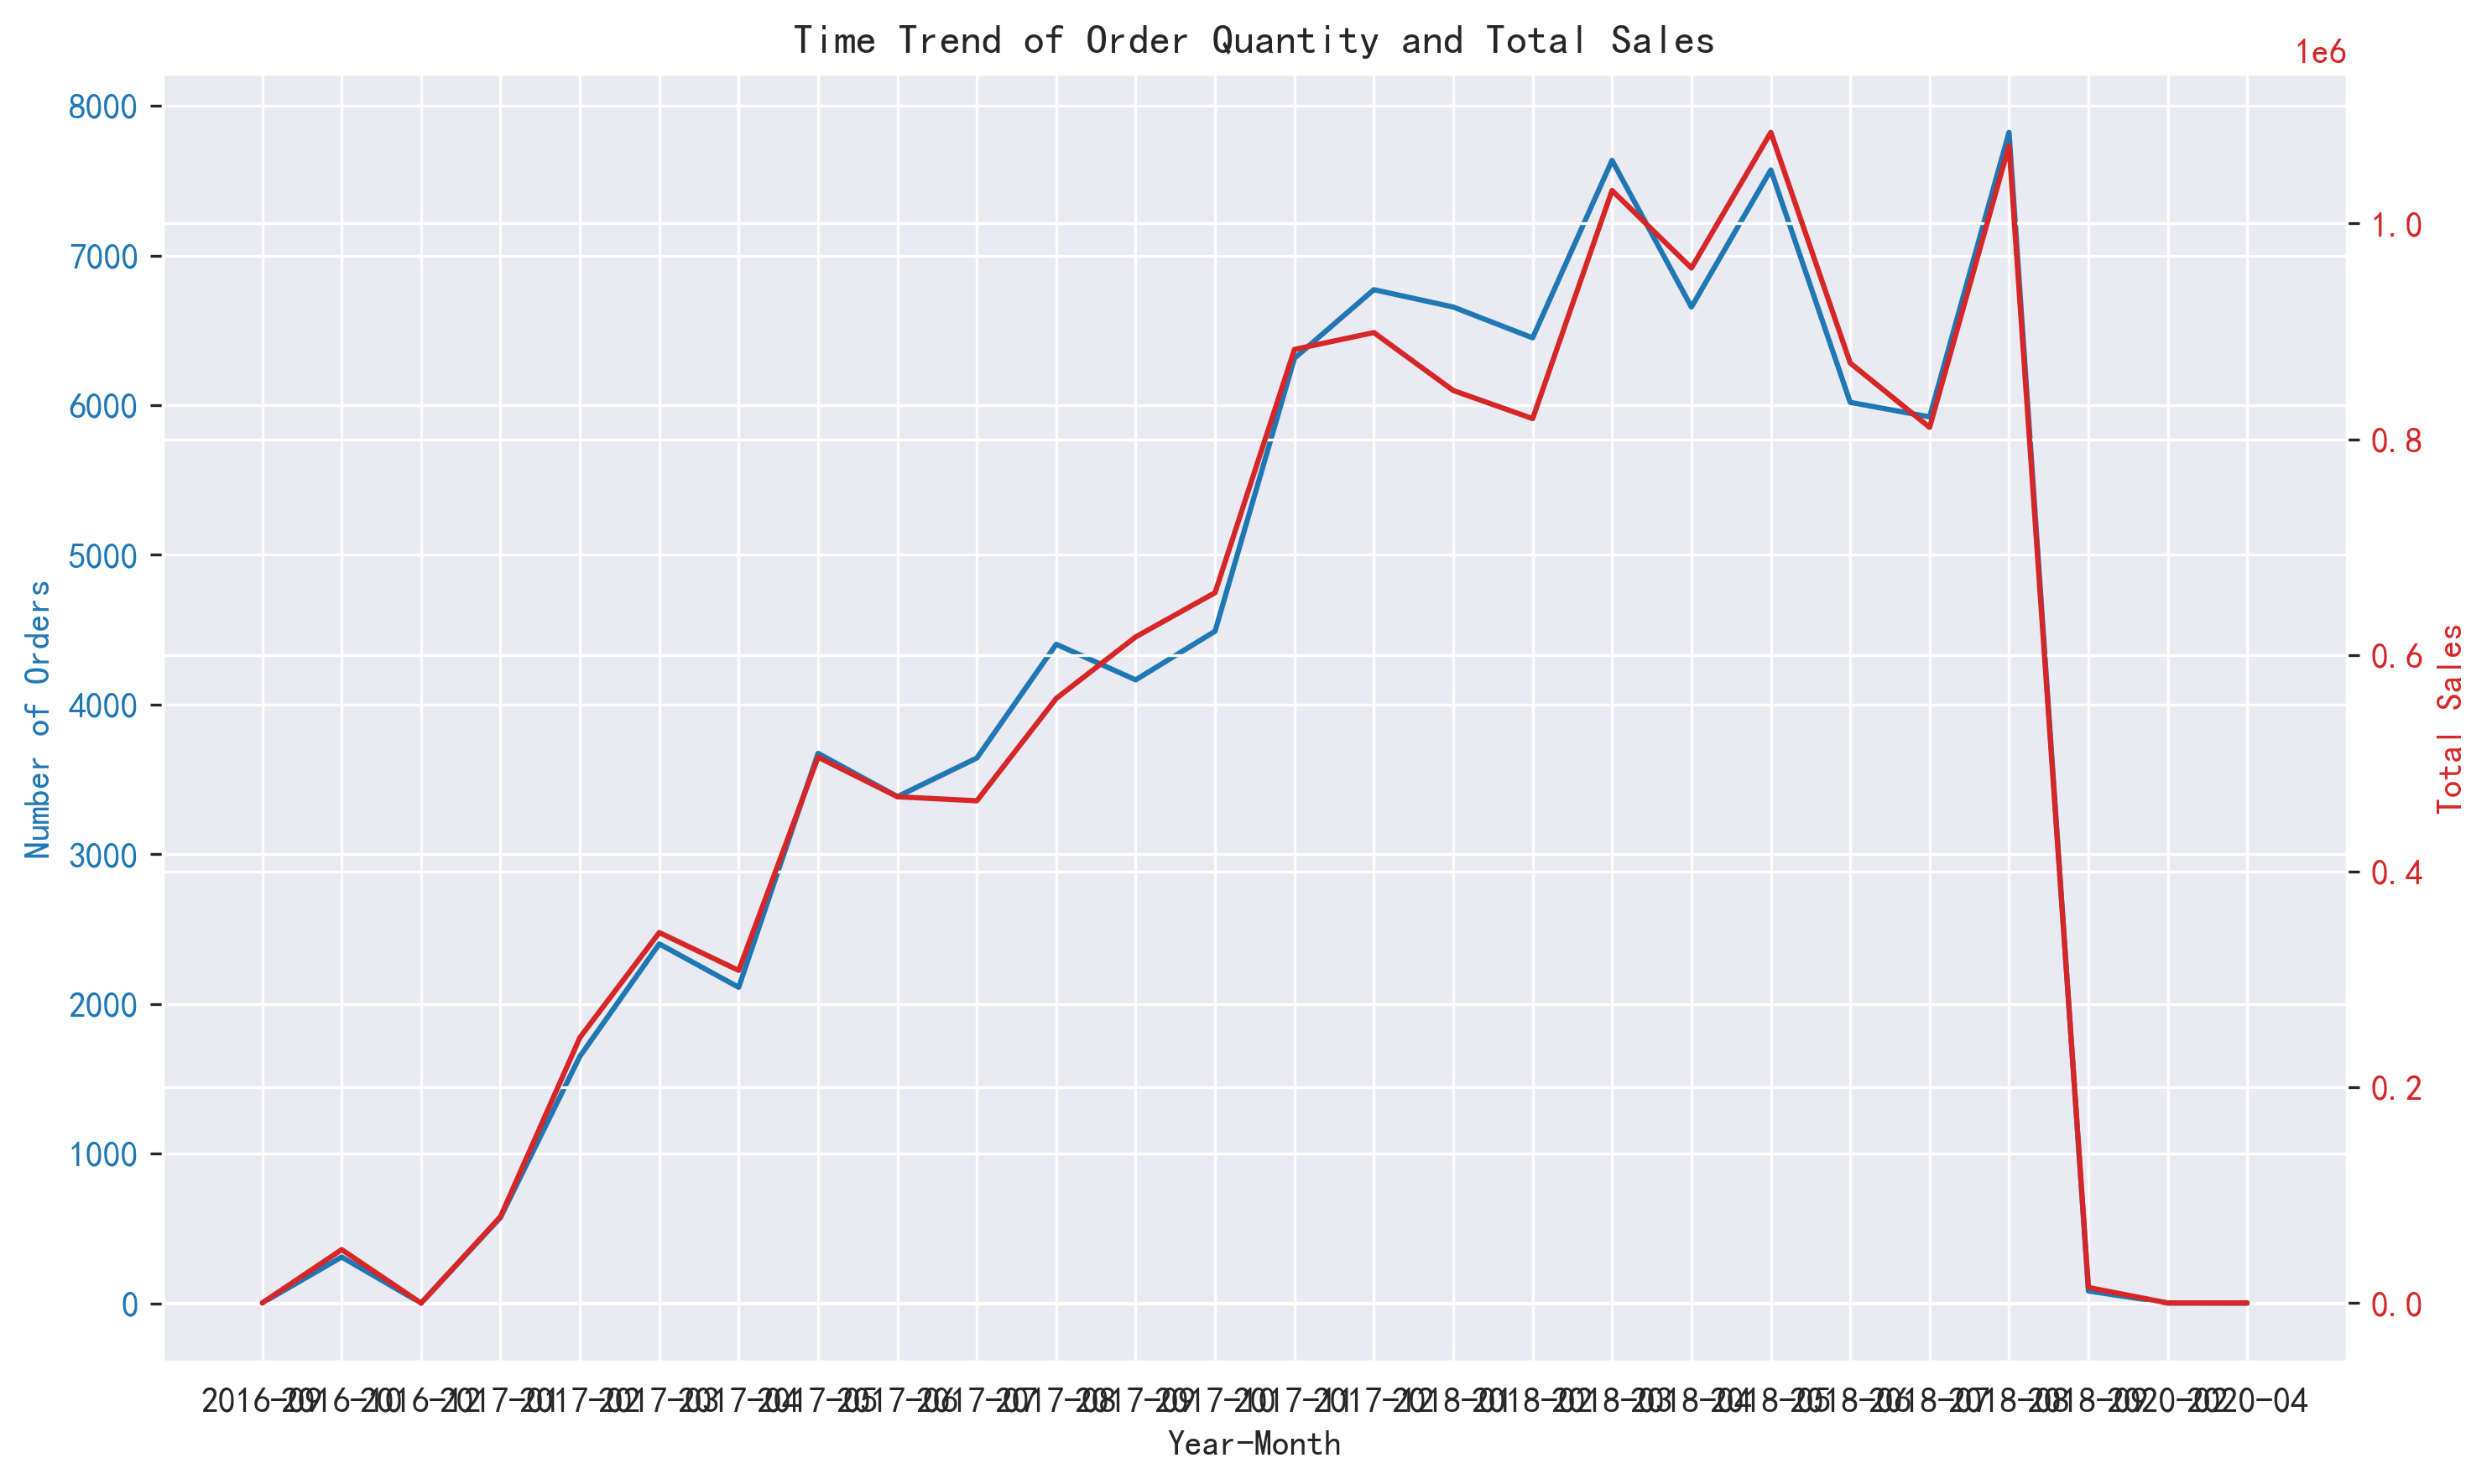

Monthly Order Quantity and Total Sales:
             Number of Orders  Total Sales
year_month                               
2016-09                    2       194.47
2016-10                  309     49580.55
2016-12                    1        10.90
2017-01                  573     80124.74
2017-02                 1650    245982.01
2017-03                 2401    343242.60
2017-04                 2111    308148.32
2017-05                 3674    505655.46
2017-06                 3385    469001.05
2017-07                 3643    465282.10
2017-08                 4403    560093.34
2017-09                 4165    617046.12
2017-10                 4490    658020.23
2017-11                 6314    883351.63
2017-12                 6772    898920.98
2018-01                 6656    845279.18
2018-02                 6450    819228.85
2018-03                 7636   1030527.84
2018-04                 6656    958729.70
2018-05                 7572   1084358.55
2018-06                 6019    870

In [11]:
# Plot time trends for order quantity and total sales
# Data preparation section
monthly_orders = order_items.groupby('year_month').agg({'order_id': 'nunique', 'price': 'sum'}).rename(
    columns={'order_id': 'Number of Orders', 'price': 'Total Sales'})

# Call function to plot line chart
plot_time_series(
    data=monthly_orders,
    title='Time Trend of Order Quantity and Total Sales',
    x_label='Year-Month',
    y_labels=['Number of Orders', 'Total Sales'],
    colors=['tab:blue', 'tab:red']
)

print('Monthly Order Quantity and Total Sales:\n', monthly_orders)

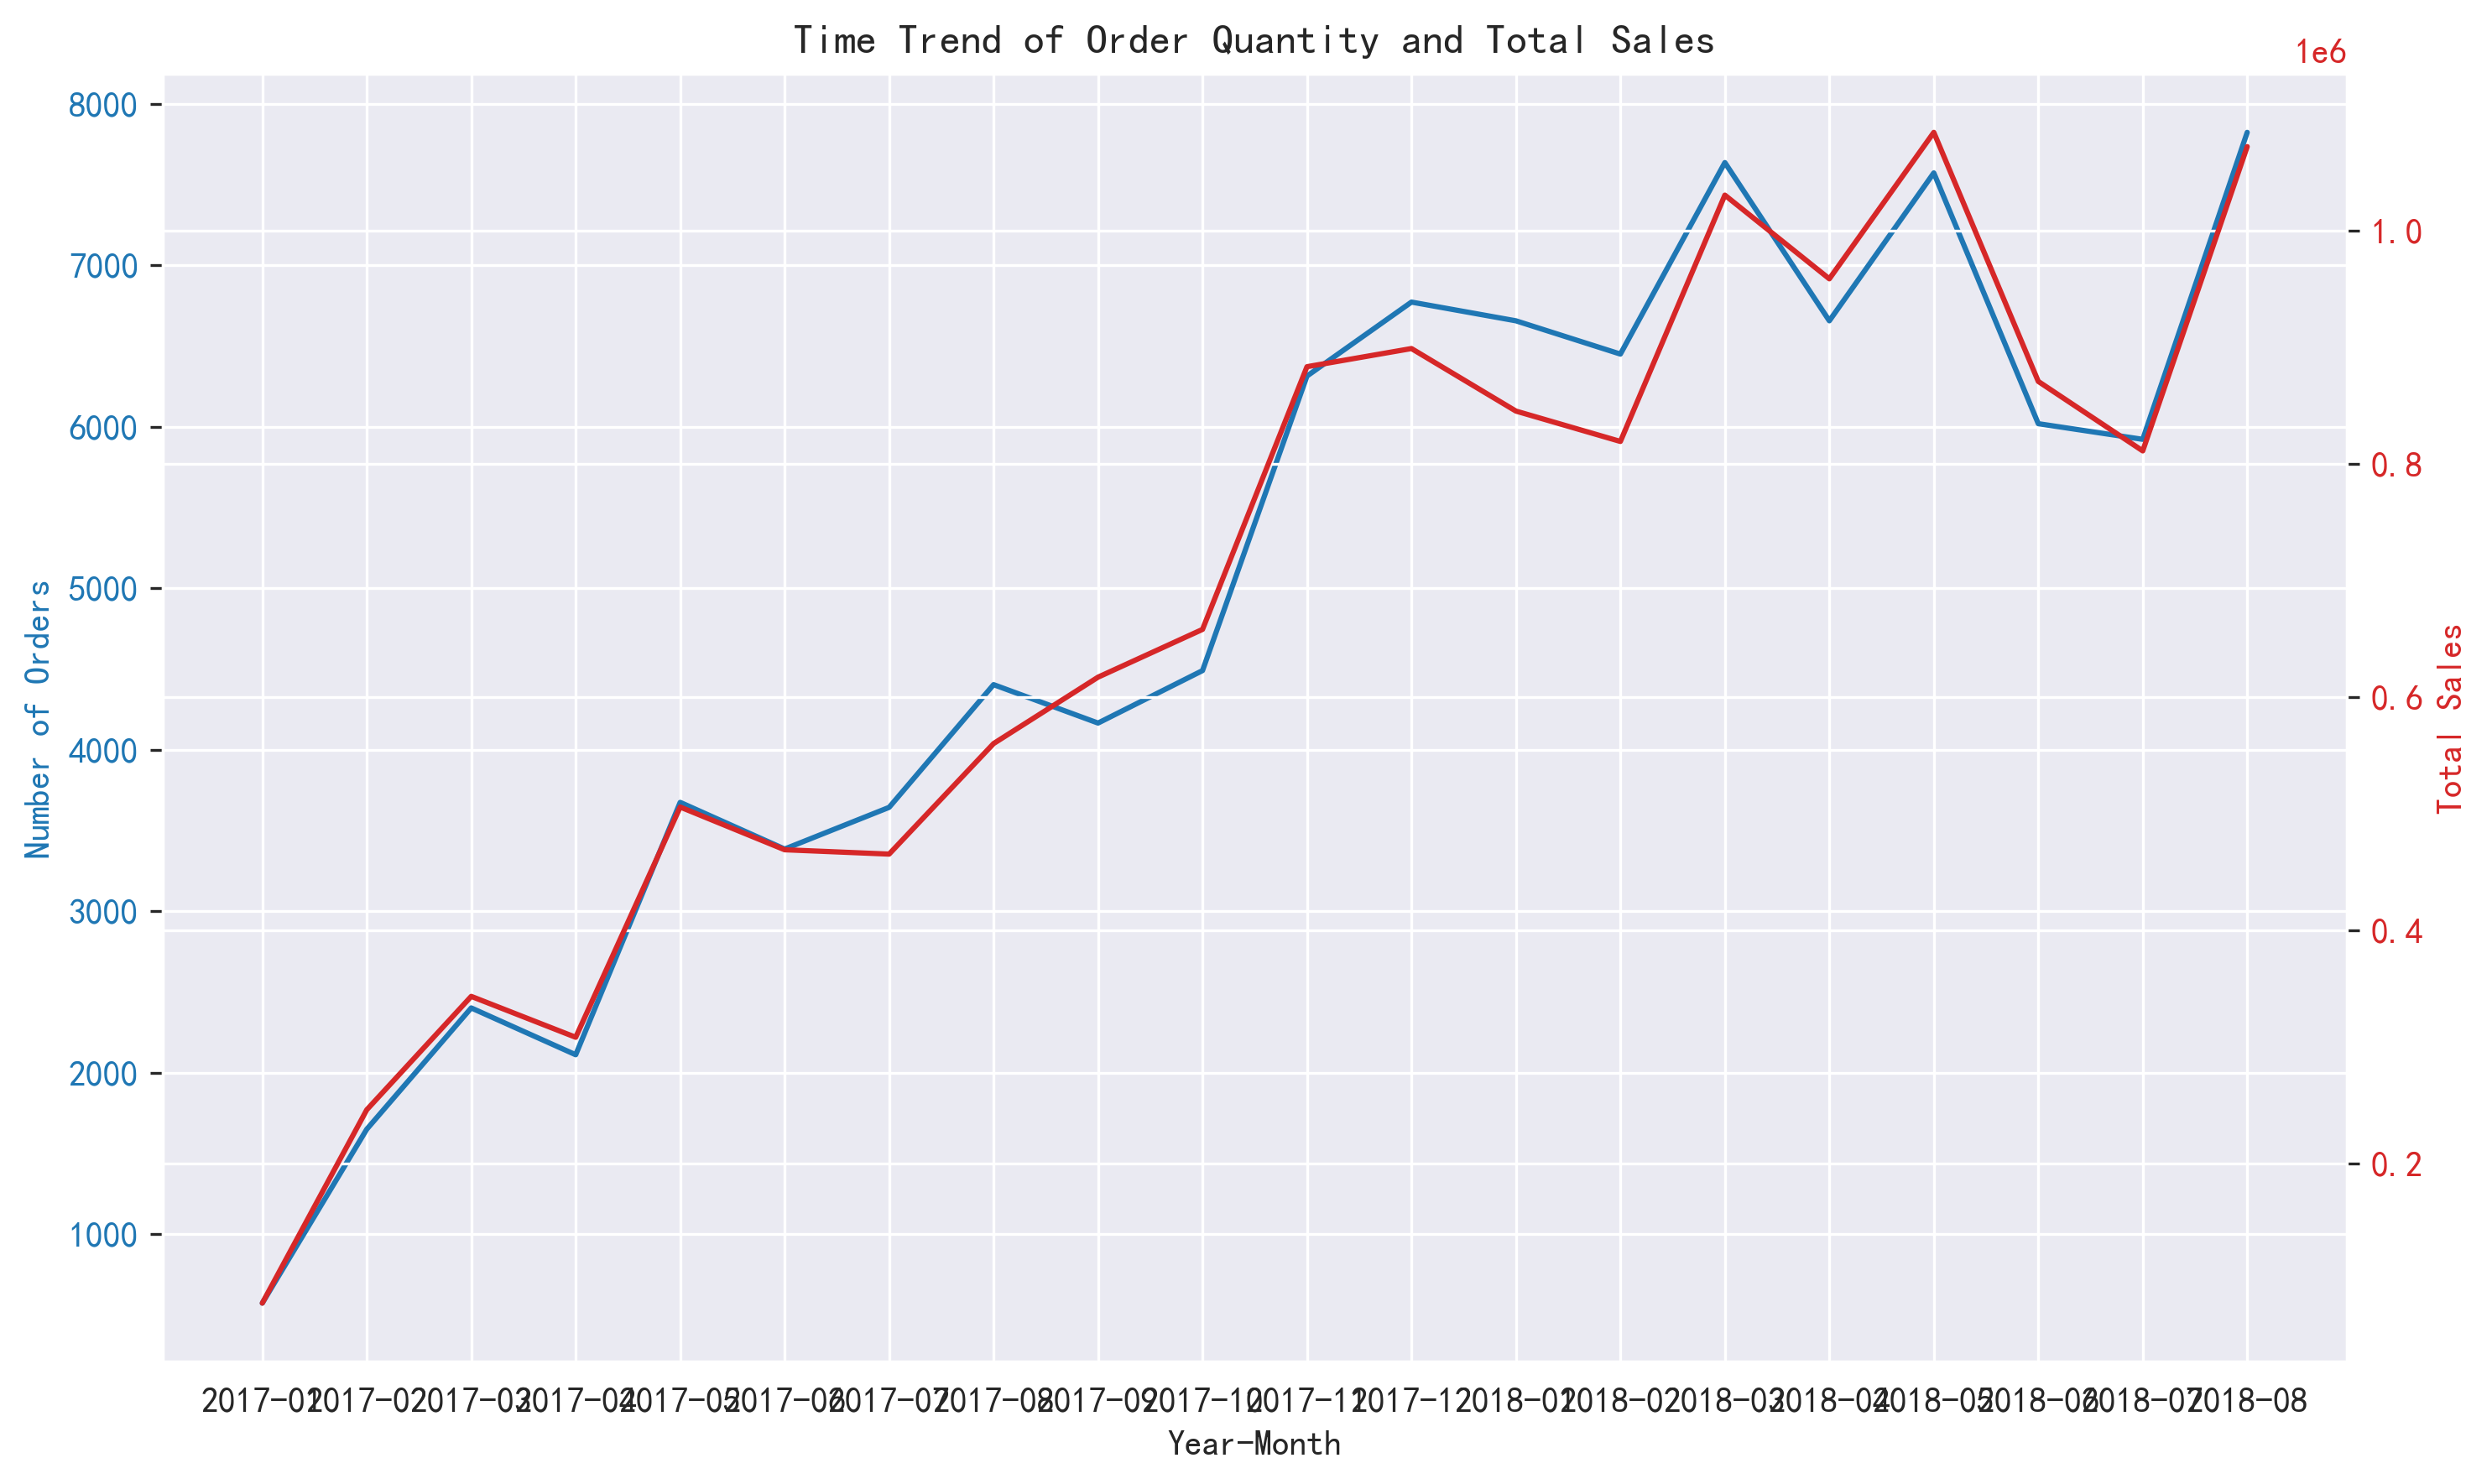

(<Figure size 3000x1800 with 2 Axes>,
 [<Axes: xlabel='Year-Month', ylabel='Number of Orders'>,
  <Axes: title={'center': 'Time Trend of Order Quantity and Total Sales'}, ylabel='Total Sales'>])

In [12]:
# Define abnormal time periods to be excluded
anomalous_months = ['2016-09', '2016-10','2016-12', '2018-09', '2020-02', '2020-04']

# Execute data exclusion
order_items_clean = order_items[~order_items['year_month'].isin(anomalous_months)].copy()
monthly_orders2 = order_items_clean.groupby('year_month').agg({'order_id': 'nunique', 'price': 'sum'}).rename(
    columns={'order_id': 'Number of Orders', 'price': 'Total Sales'})

# Call function to plot line chart
plot_time_series(
    data=monthly_orders2,
    title='Time Trend of Order Quantity and Total Sales',
    x_label='Year-Month',
    y_labels=['Number of Orders', 'Total Sales'],
    colors=['tab:blue', 'tab:red']
)

In [13]:
# Save the processed data as a CSV file
csv_path = r'D:\New_Desktop\project-main\clean_data\order_items.csv'
order_items.to_csv(csv_path, index=False)

print(f'The processed data has been saved to: {csv_path}')

The processed data has been saved to: D:\New_Desktop\project-main\clean_data\order_items.csv


# 订单信息数据
<pre>
    - order_id 
    - customer_id, 
    - order_status， 
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date
</pre>

## 关键指标统计

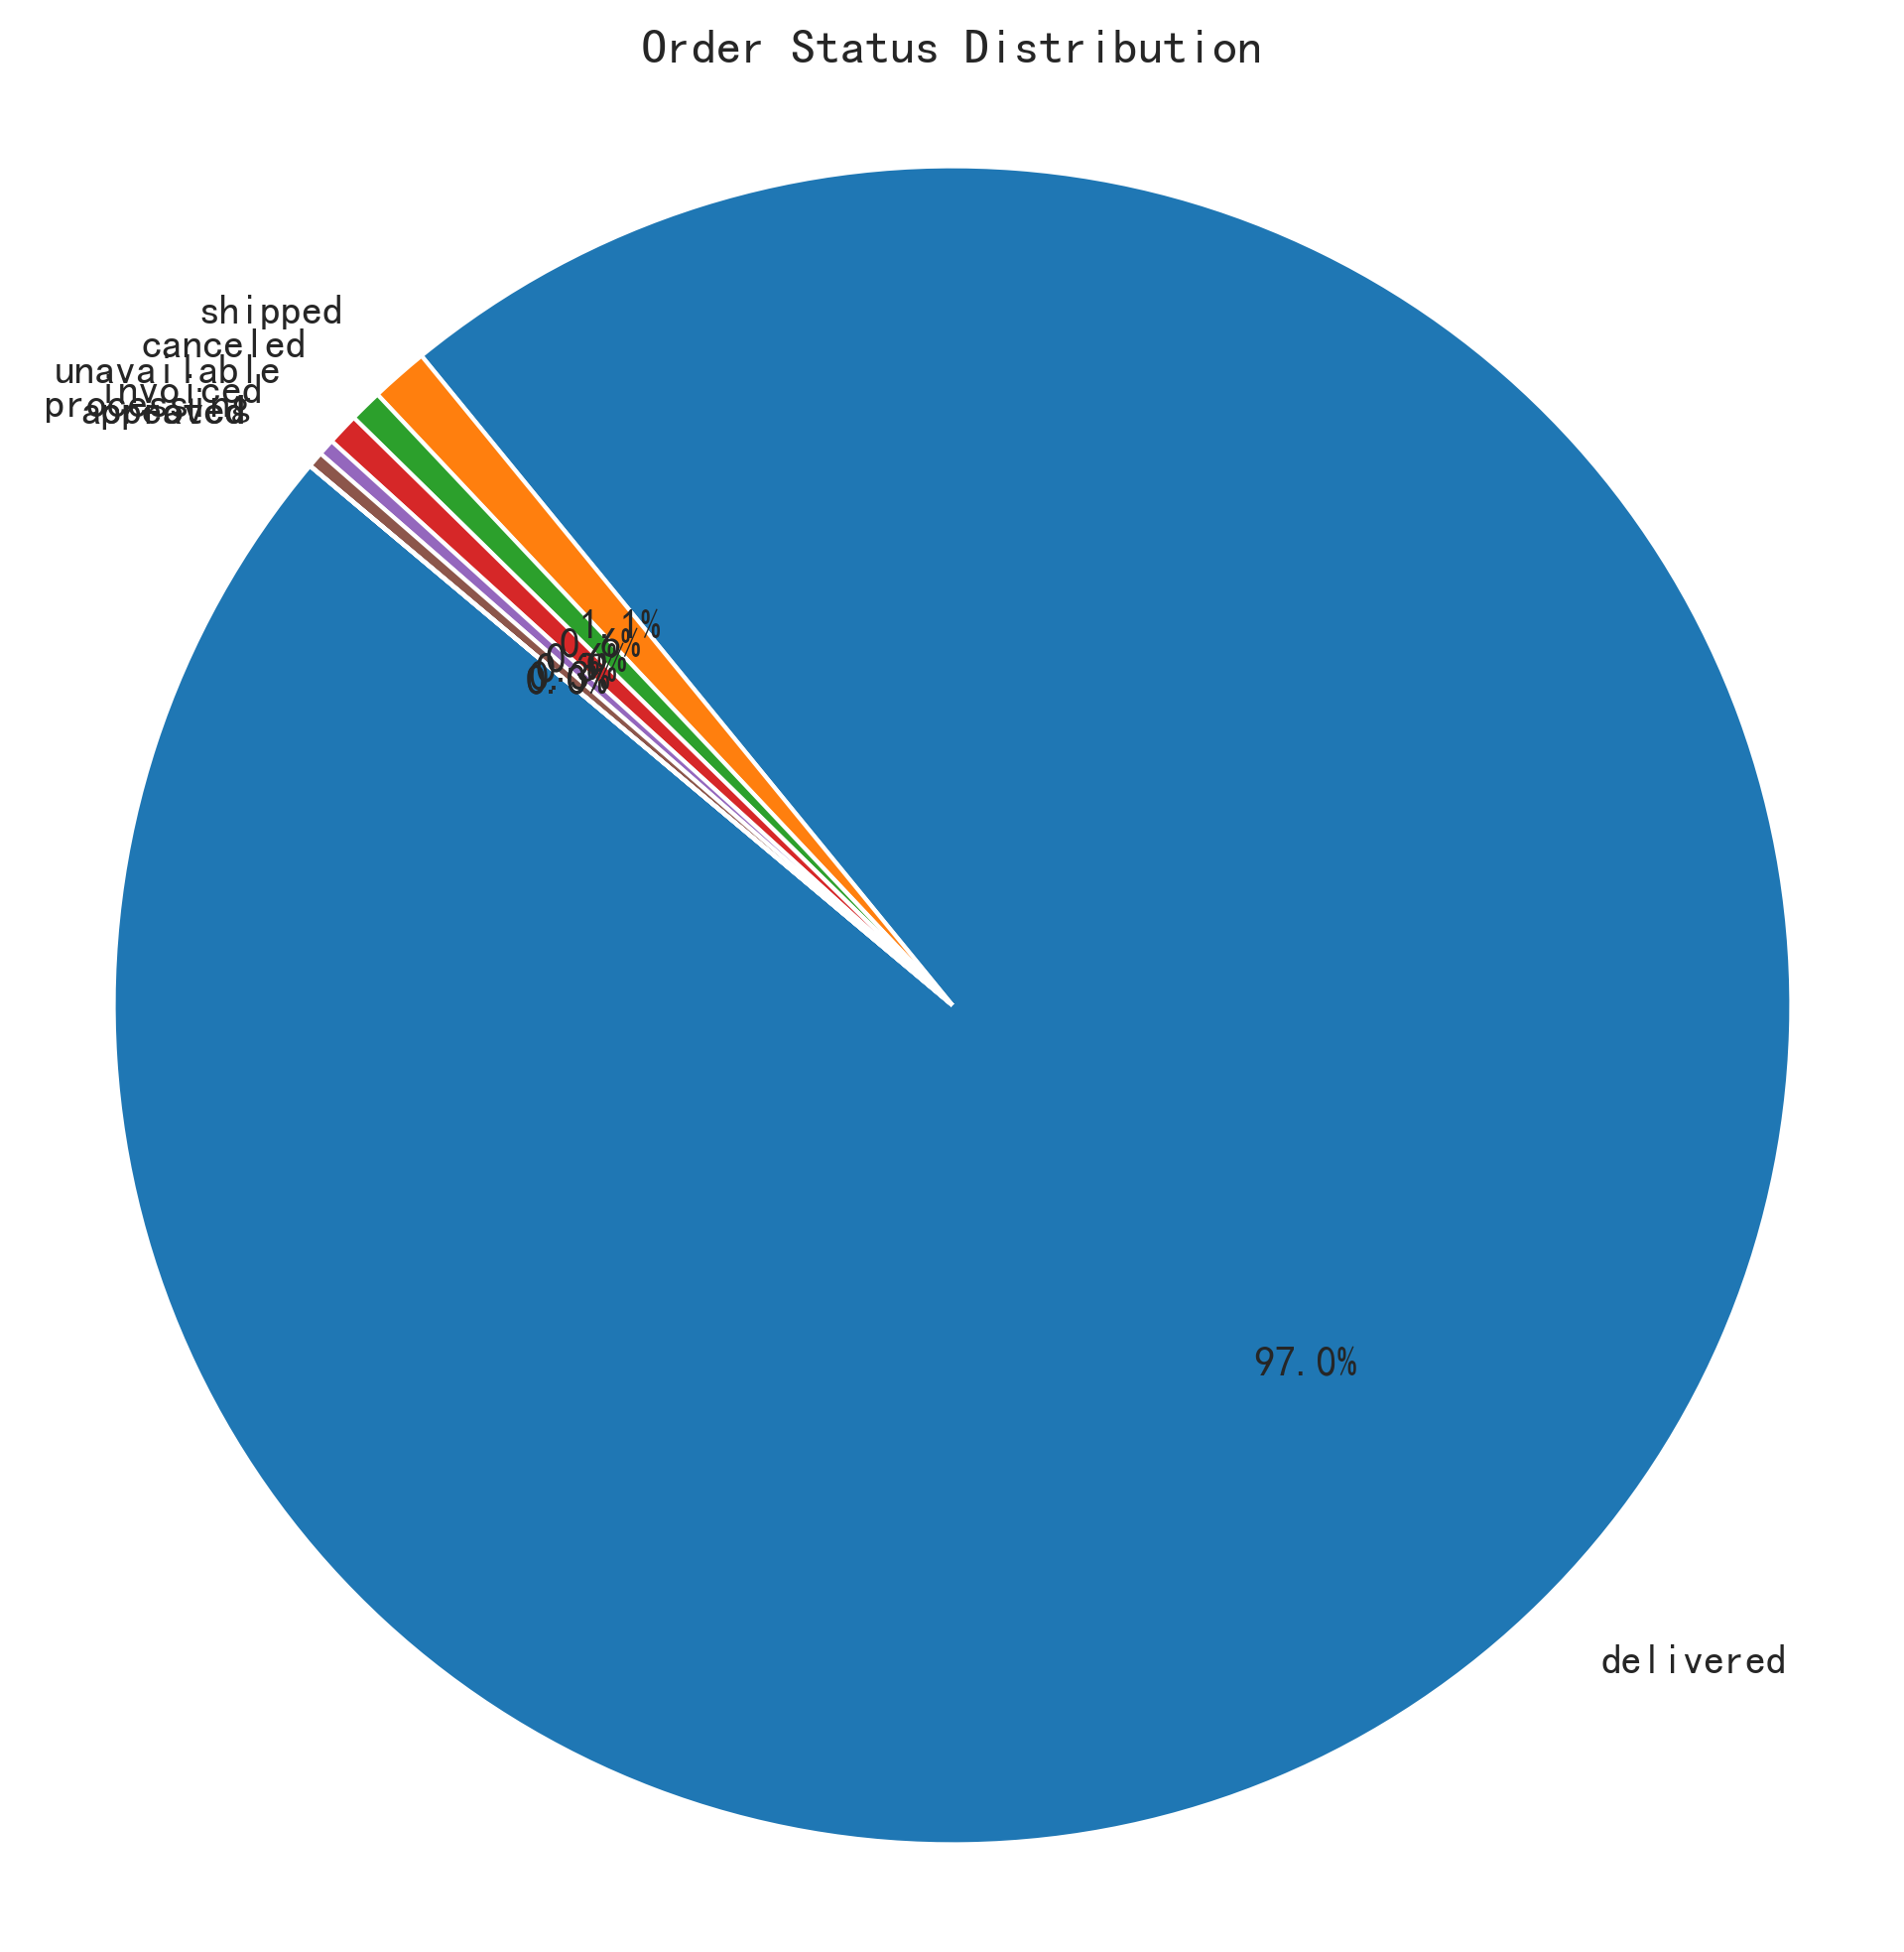

{'Category Counts': order_status
 delivered      96478
 shipped         1107
 canceled         625
 unavailable      609
 invoiced         314
 processing       301
 created            5
 approved           2
 Name: count, dtype: int64,
 'Percentage (%)': order_status
 delivered      97.020344
 shipped         1.113223
 canceled        0.628513
 unavailable     0.612423
 invoiced        0.315765
 processing      0.302692
 created         0.005028
 approved        0.002011
 Name: count, dtype: float64}

In [14]:
plot_pie_chart(orders_sorted['order_status'], title='Order Status Distribution')

## 删除重复值和缺失值

In [15]:
# Check for duplicate values
duplicate_rows = orders_sorted.duplicated().sum()

# Check for missing values
missing_values = orders_sorted.isnull().sum()

print('Number of duplicate values:', duplicate_rows)
print('Number of missing values in each column:\n', missing_values)

Number of duplicate values: 0
Number of missing values in each column:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [16]:
# Filter the data where the order status is 'delivered'
delivered_orders = orders_sorted[orders_sorted['order_status'] == 'delivered']

# Count the number of rows with missing values
missing_value_count = delivered_orders.isnull().any(axis=1).sum()

print('The number of missing values where the order status is delivered:', missing_value_count)

The number of missing values where the order status is delivered: 23


In [17]:
# Convert time fields to datetime
time_cols = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date'
]
for col in time_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

# Retain delivered orders that follow the normal process and have complete time fields
filtered_orders = orders[
    (orders['order_status'] == 'delivered') &
    orders[time_cols].notna().all(axis=1)
].copy()

In [18]:
# 检查缺失值
missing_values = filtered_orders.isnull().sum()

print('The number of missing values in each column:\n', missing_values)

The number of missing values in each column:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


## 特征工程

In [22]:
orders_sorted = filtered_orders
# Ensure that the time column is of datetime type
orders_sorted['order_purchase_timestamp'] = pd.to_datetime(orders_sorted['order_purchase_timestamp'])
orders_sorted['order_approved_at'] = pd.to_datetime(orders_sorted['order_approved_at'])
orders_sorted['order_delivered_carrier_date'] = pd.to_datetime(orders_sorted['order_delivered_carrier_date'])
orders_sorted['order_delivered_customer_date'] = pd.to_datetime(orders_sorted['order_delivered_customer_date'])

# Calculate the time spent at each stage (in hours)
orders_sorted['processing_time_approved'] = (
    orders_sorted['order_approved_at'] - orders_sorted['order_purchase_timestamp']
).dt.total_seconds() / 3600

orders_sorted['shipping_time'] = (
    orders_sorted['order_delivered_carrier_date'] - orders_sorted['order_approved_at']
).dt.total_seconds() / 3600

orders_sorted['delivery_time'] = (
    orders_sorted['order_delivered_customer_date'] - orders_sorted['order_delivered_carrier_date']
).dt.total_seconds() / 3600

# Fill in missing values with the mean
orders_sorted['processing_time_approved'].fillna(orders_sorted['processing_time_approved'].mean(), inplace=True)
orders_sorted['shipping_time'].fillna(orders_sorted['shipping_time'].mean(), inplace=True)
orders_sorted['delivery_time'].fillna(orders_sorted['delivery_time'].mean(), inplace=True)

C:\Users\13579\AppData\Local\Temp\ipykernel_3988\359893529.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_sorted['processing_time_approved'].fillna(orders_sorted['processing_time_approved'].mean(), inplace=True)
C:\Users\13579\AppData\Local\Temp\ipykernel_3988\359893529.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

## 关键指标统计

In [23]:
# Analyze the descriptive statistics of processing time, shipping time, and delivery time (retain two decimal places)
time_analysis = orders_sorted[['processing_time_approved','shipping_time', 'delivery_time']].describe().round(2)
time_analysis

,processing_time_approved,shipping_time,delivery_time
count,96455.00,96455.00,96455.00
mean,10.28,67.18,223.93
std,20.54,84.89,210.25
min,0.00,-4109.26,-386.31
25%,0.22,20.98,98.39
50%,0.34,43.58,170.39
75%,14.52,85.80,288.70
max,741.44,3018.30,4924.58


### 异常值处理

In [24]:
# Filter out abnormal orders with negative time differences
negative_shipping = orders_sorted[(orders_sorted['order_status'] == 'delivered') & (orders_sorted['shipping_time'] < 0)]
negative_delivery = orders_sorted[(orders_sorted['order_status'] == 'delivered') & (orders_sorted['delivery_time'] < 0)]

# Merge all abnormal orders and remove duplicates
negative_time_orders = pd.concat([negative_shipping, negative_delivery]).drop_duplicates()

negative_time_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time_approved,shipping_time,delivery_time
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,124.463889,-32.617222,240.675556
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15 00:00:00,57.619167,-23.102222,24.212222
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31 00:00:00,130.705833,-58.581389,35.021944
210,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31 00:00:00,14.030000,-0.131389,31.045000
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06 00:00:00,130.439444,-81.469167,82.044167


In [25]:
#Directly remove abnormal data
# Conditional screening: The approval time should be earlier than the shipping time and the customer receipt time
mask_valid = (
    (orders_sorted['order_approved_at'] <= orders_sorted['order_delivered_carrier_date']) &
    (orders_sorted['order_approved_at'] <= orders_sorted['order_delivered_customer_date'])&
     (orders_sorted['order_delivered_carrier_date'] <= orders_sorted['order_delivered_customer_date'])
)

# Remove records with abnormal time logic
orders_cleaned = orders_sorted[mask_valid].copy()

In [26]:
time_analysis2 = orders_cleaned[['processing_time_approved','shipping_time', 'delivery_time']].describe().round(2)
time_analysis2

,processing_time_approved,shipping_time,delivery_time
count,95082.00,95082.00,95082.00
mean,9.65,68.44,224.74
std,19.12,83.59,210.47
min,0.00,0.00,0.00
25%,0.21,21.61,98.67
50%,0.34,44.37,170.65
75%,13.54,86.78,289.39
max,741.44,3018.30,4924.58


In [27]:
# Save the processed data as a CSV file
csv_path = r'D:\New_Desktop\project-main\clean_data\orders_dataset.csv'
orders_cleaned.to_csv(csv_path, index=False)

print(f'The processed data has been saved to:{csv_path}')

The processed data has been saved to:D:\New_Desktop\project-main\clean_data\orders_dataset.csv


# 产品信息数据
<pre>
    - product_id 
    - product_category_name
    - product_name_lenght
    - product_description_lenght
    - product_photos_qty
    - product_weight_g
    - product_length_cm
    - product_height_cm
    - product_width_cm
</pre>

## 处理重复值和缺失值

In [28]:
# Detect duplicate values
duplicate_rows = products.duplicated()

# Check the number of duplicate values
duplicate_count = duplicate_rows.sum()

if duplicate_count > 0:
    # There are duplicate values. Delete the duplicates
    products = products[~duplicate_rows]
    print(f'{duplicate_count} duplicate records have been deleted.')
else:
    print('There are no duplicate values in the data.')

# Detect missing values
missing_values = products.isnull().sum()


print('Number of missing values:\n', missing_values)

There are no duplicate values in the data.
Number of missing values:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [29]:
# Handle Missing Values
for column in products.columns:
    if products[column].dtype == 'object':
        # Categorical variables are filled with the mode
        products[column].fillna(products[column].mode()[0], inplace=True)
    else:
        # Numerical variables are filled with the mean
        products[column].fillna(products[column].mean(), inplace=True)

C:\Users\13579\AppData\Local\Temp\ipykernel_3988\3757666190.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products[column].fillna(products[column].mode()[0], inplace=True)
C:\Users\13579\AppData\Local\Temp\ipykernel_3988\3757666190.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [30]:
# Detect missing values
missing_values = products.isnull().sum()


print('Number of missing values:\n', missing_values)

Number of missing values:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


## 关键指标统计

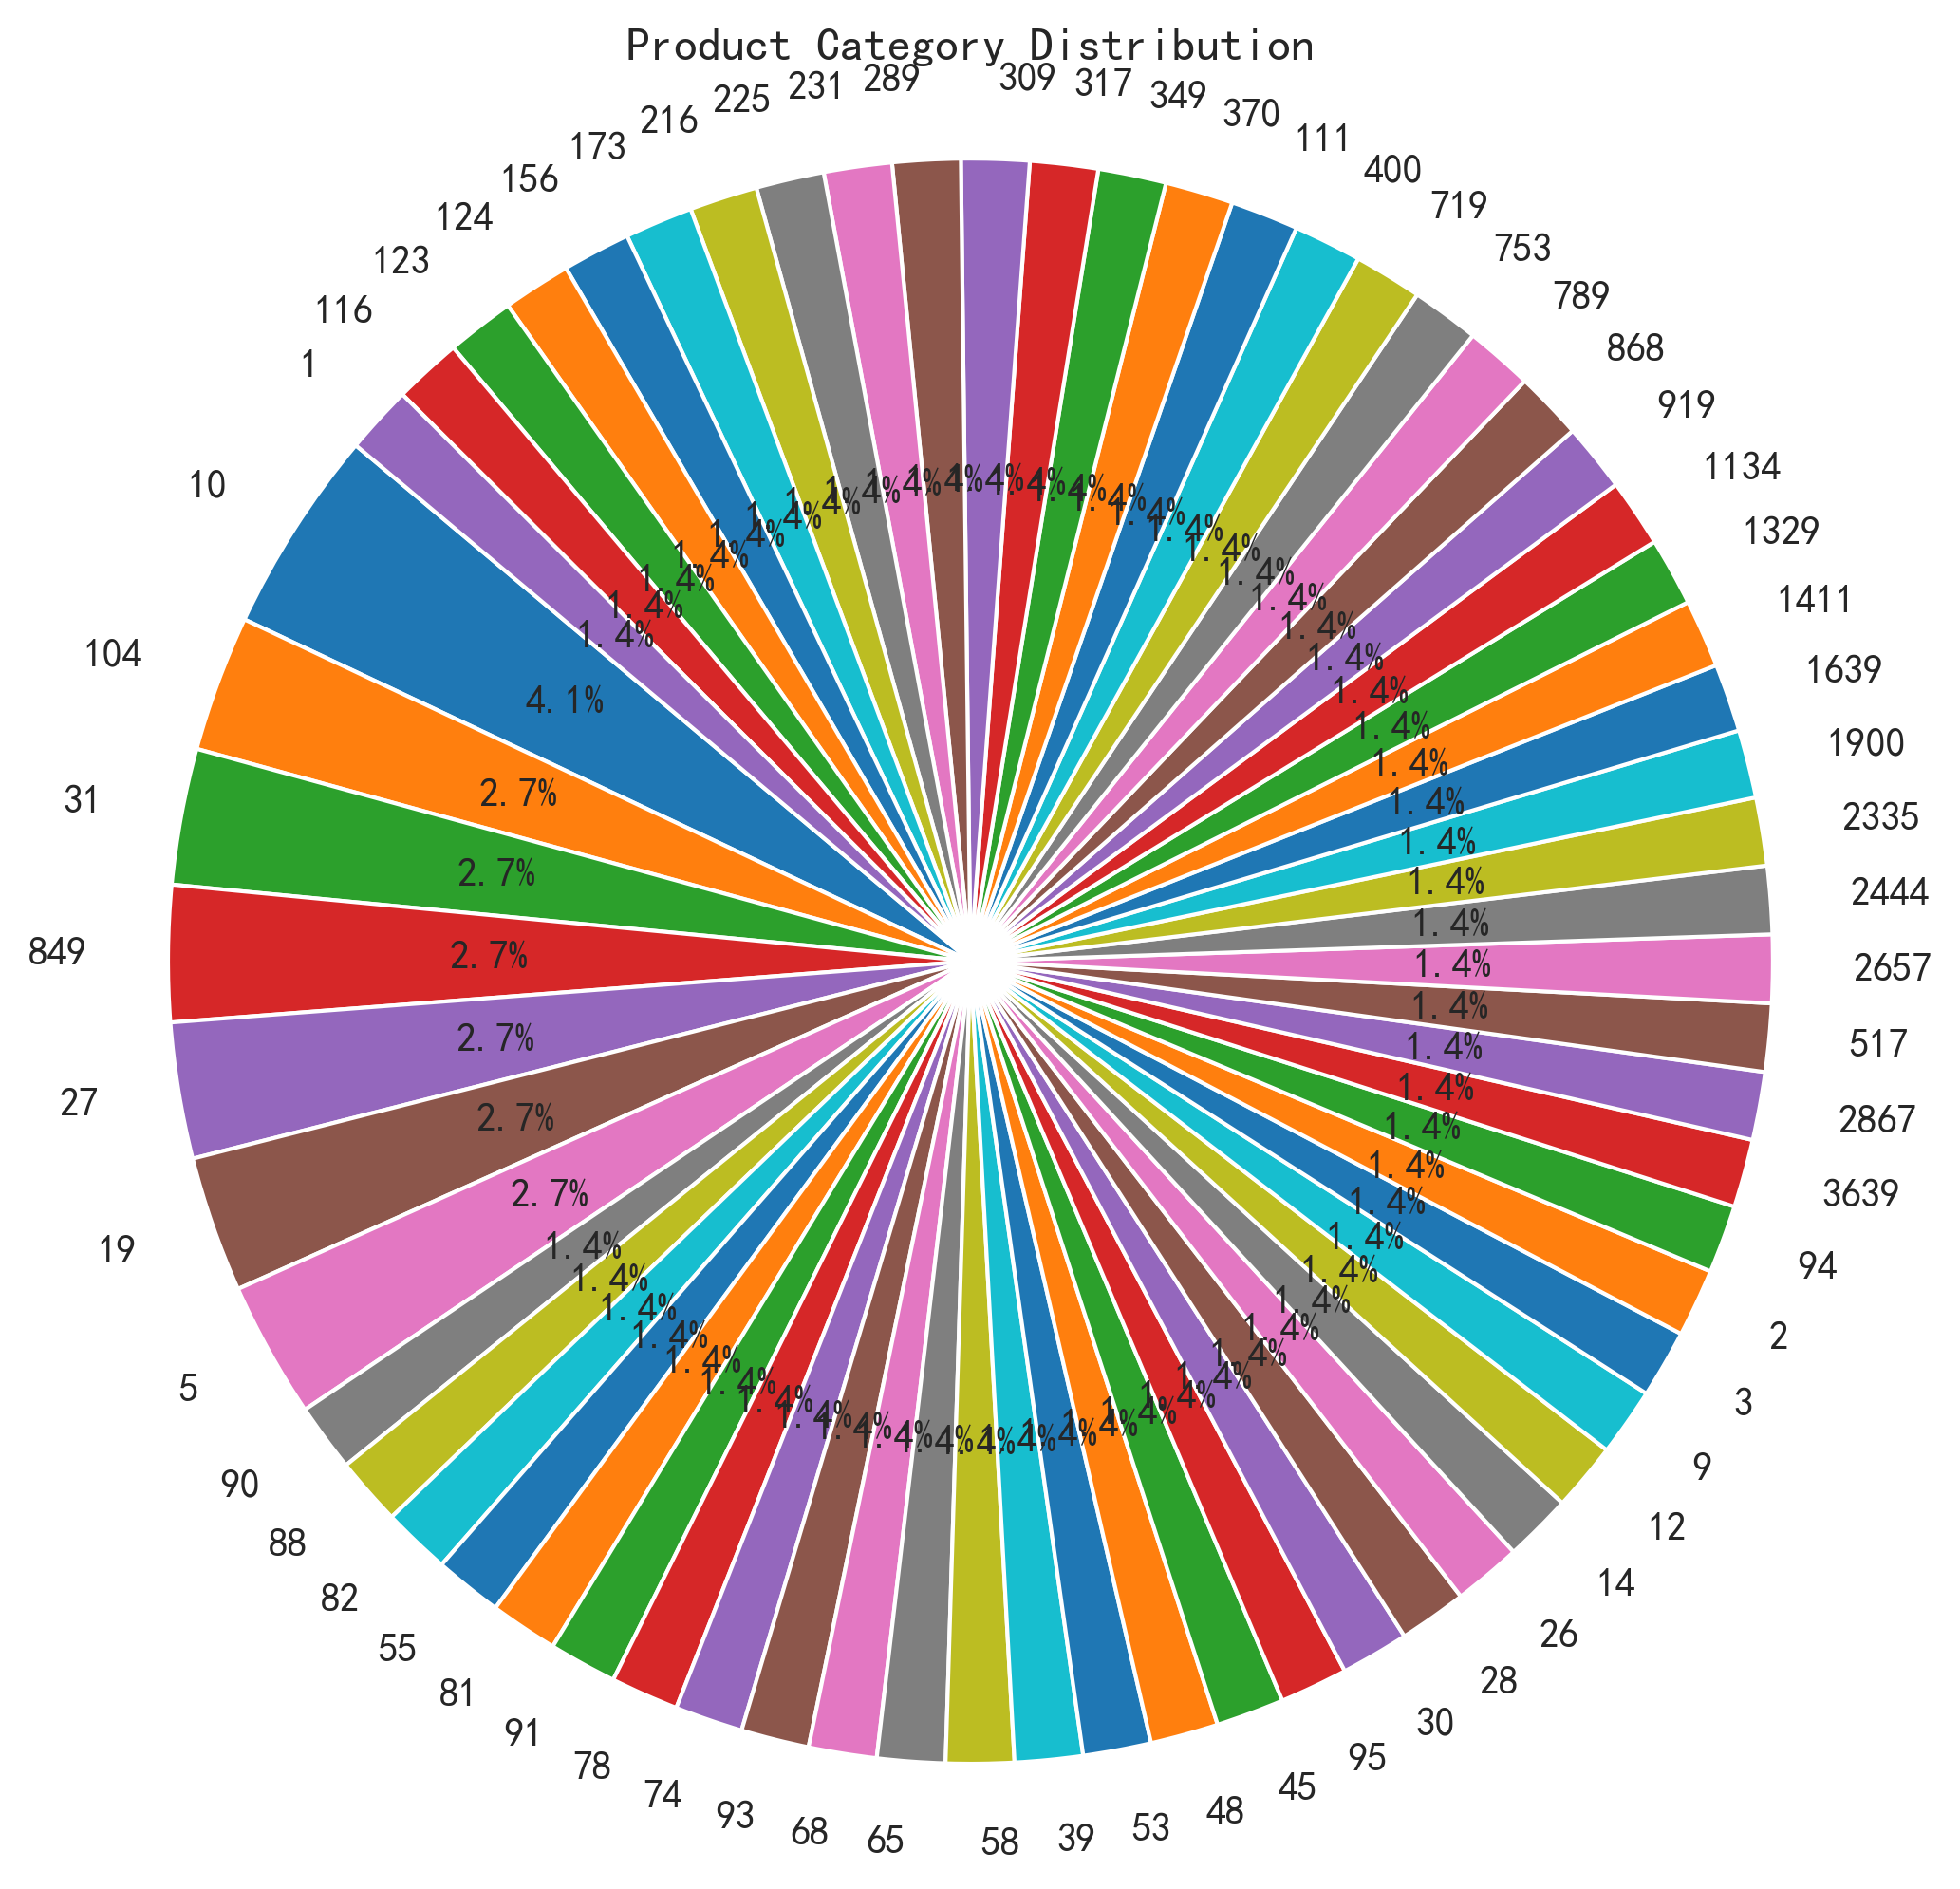

The quantity of different product categories:
 product_category_name
cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [31]:
# Count the quantity of different product categories
category_distribution = products['product_category_name'].value_counts()
# Calculate the total number of product categories
total_categories = len(category_distribution)
# Call a function to draw a pie chart
plot_pie_chart(category_distribution, title="Product Category Distribution")
# Print the quantity of different product categories
print('The quantity of different product categories:\n', category_distribution)


In [32]:
# Save the processed data as a CSV file
csv_path = r'D:\New_Desktop\project-main\clean_data\products.csv'
products.to_csv(csv_path, index=False)

print(f'The processed data has been saved to:{csv_path}')

The processed data has been saved to:D:\New_Desktop\project-main\clean_data\products.csv


# 用户评分数据

处理重复值和缺失值

In [33]:
# Detect missing values
missing_values = order_reviews.isnull().sum()

# Check the proportion of missing values
missing_value_percentage = (missing_values / len(order_reviews)) * 100

print('The number of missing values:\n', missing_values)
print('Proportion of missing values:\n', missing_value_percentage)

The number of missing values:
 review_id       0
order_id        0
review_score    0
dtype: int64
Proportion of missing values:
 review_id       0.0
order_id        0.0
review_score    0.0
dtype: float64


无重复和缺失值

## 关键指标统计

C:\Users\13579\AppData\Local\Temp\ipykernel_3988\479376343.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_counts, x='review_score', y='percentage (%)', palette='Blues_d')


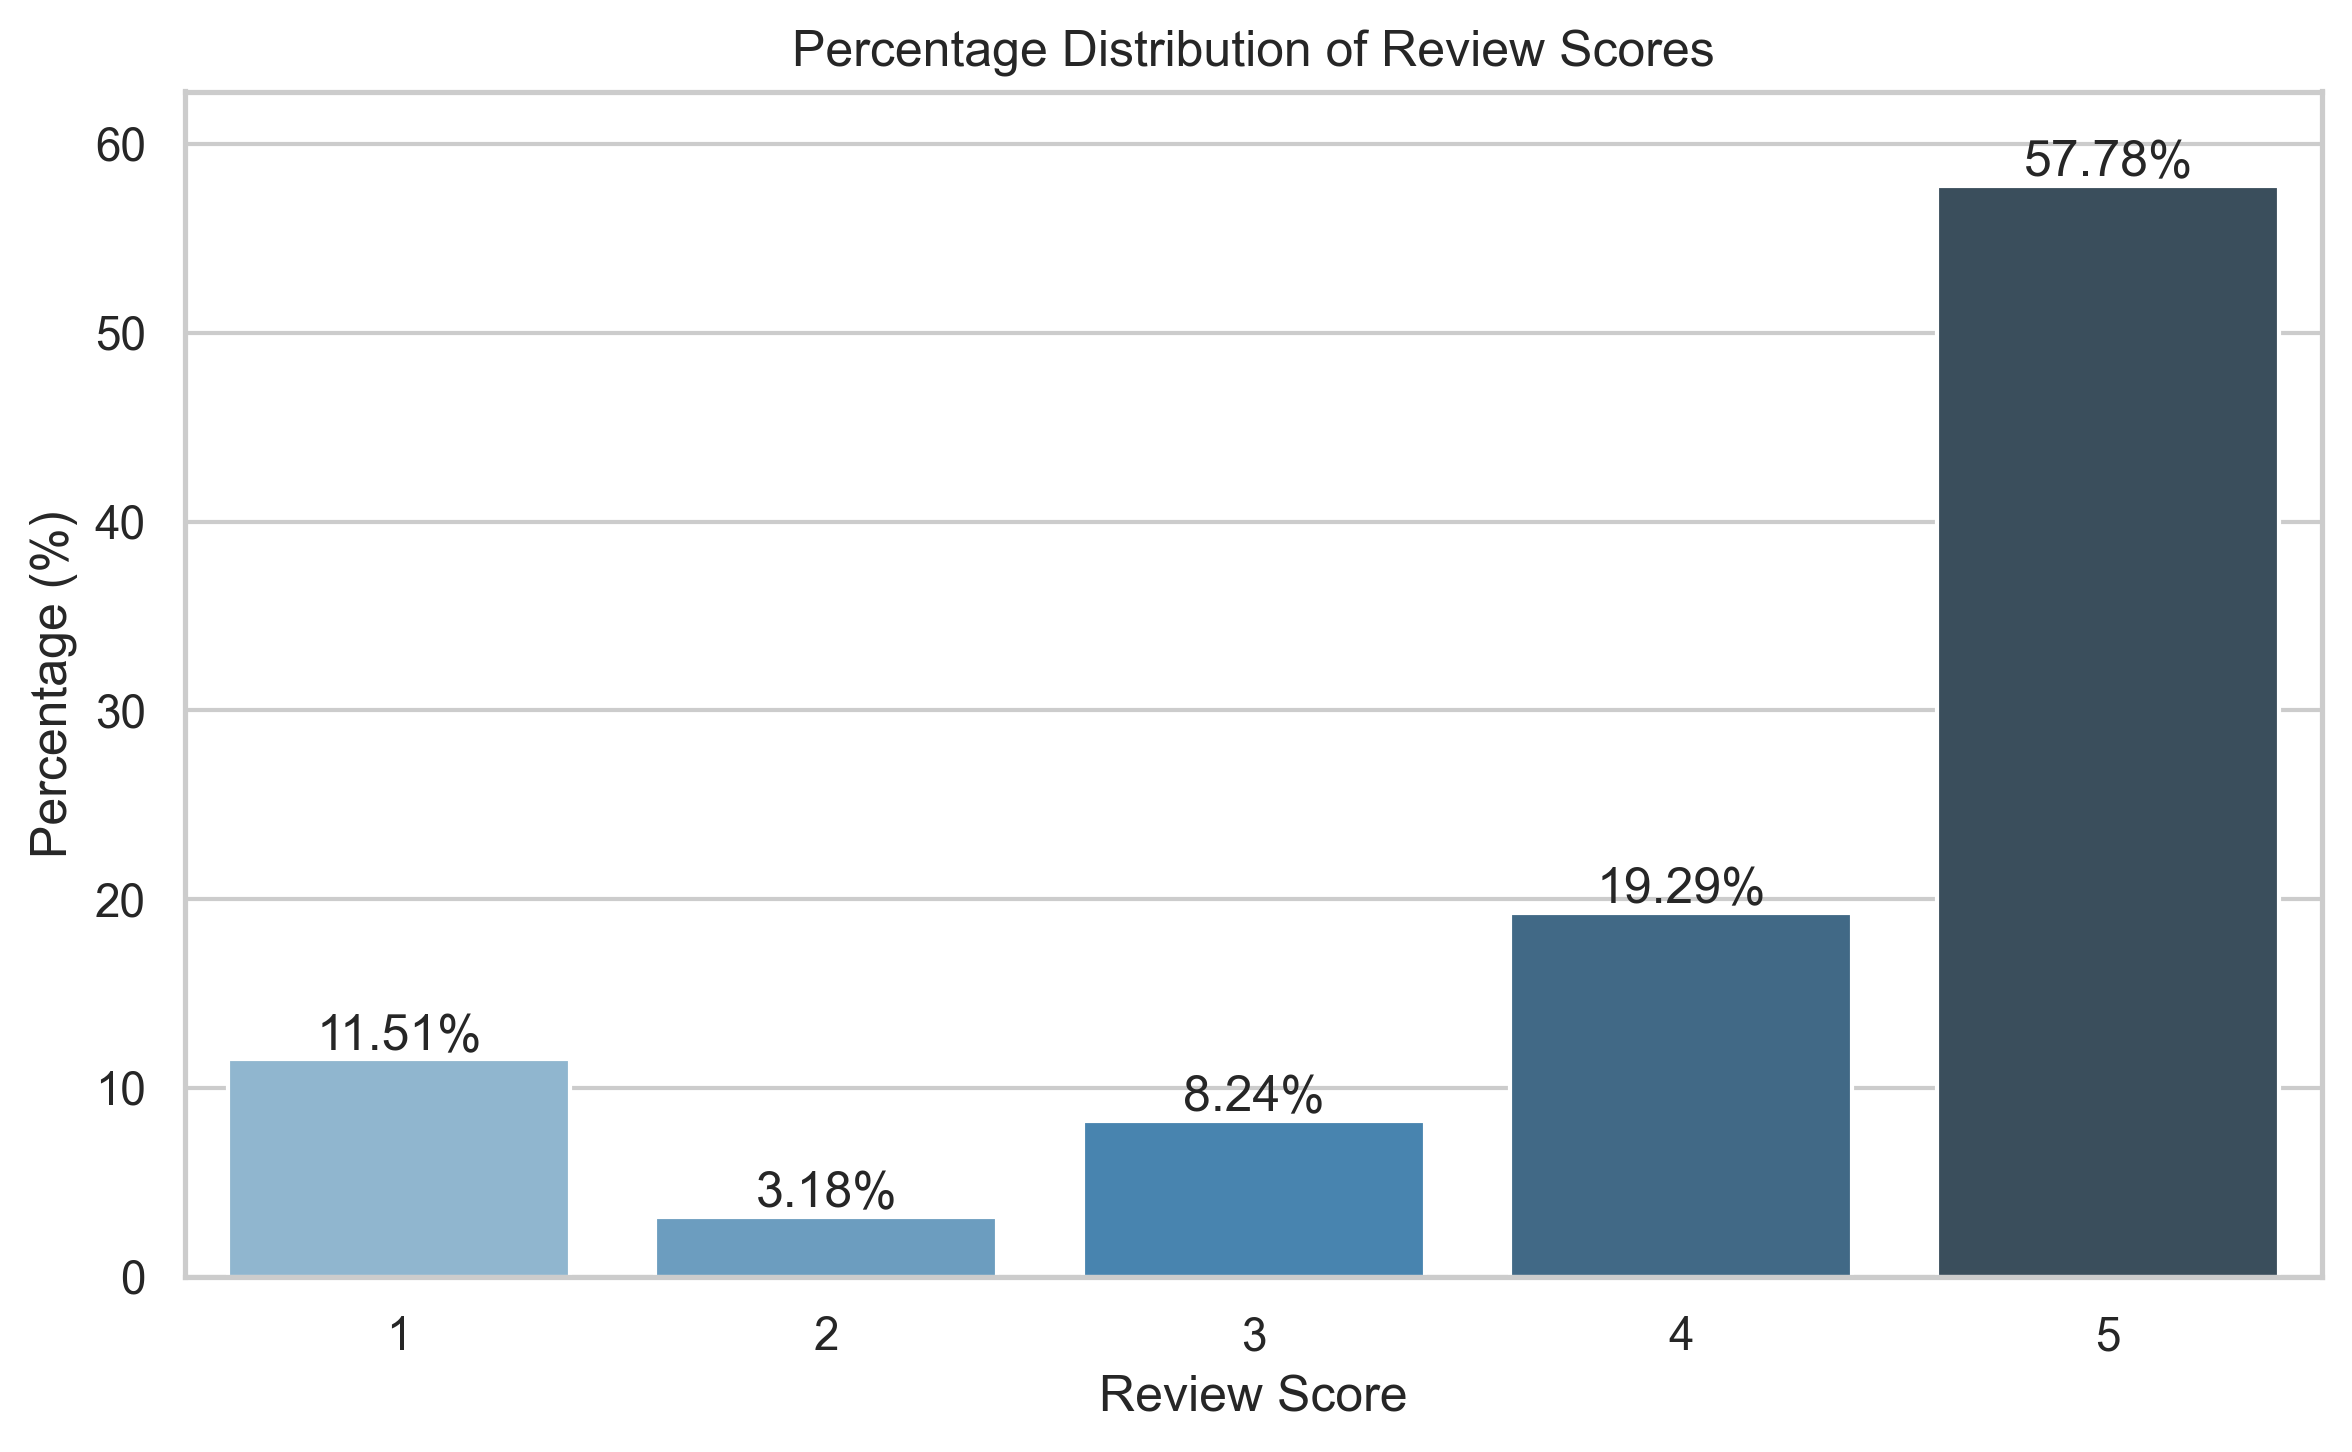

In [35]:
# Check the rating column and its value distribution
score_counts = order_reviews['review_score'].value_counts(normalize=True).sort_index() * 100
score_counts = score_counts.round(2).reset_index()
score_counts.columns = ['review_score', 'percentage (%)']
score_counts
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style="whitegrid")

# 绘制柱状图
plt.figure(figsize=(8, 5))
sns.barplot(data=score_counts, x='review_score', y='percentage (%)', palette='Blues_d')

# 添加图形细节
plt.title('Percentage Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Percentage (%)')
plt.ylim(0, score_counts['percentage (%)'].max() + 5)

# 在柱子上显示具体数值
for index, row in score_counts.iterrows():
    plt.text(index, row['percentage (%)'] + 0.5, f"{row['percentage (%)']}%", ha='center')

plt.tight_layout()
plt.show()
